# Objective
- Identify key factors that contribute to employee turnover, perform predictive modeling to assess employees who are most likely to leave, and provide insights for developing targeted retention strategies based on demographics, performance metrics, job satisfaction levels, and other relevant employee data. This type of project would ultimately help HR departments to proactively address potential attrition risks and improve employee retention rates.


# Method of Analysis
- **Classification**
  -  Analyze the various employee factors and variables to predict whether an employee is likely to leave the company, essentially classifying them as "attritted" or "not attritted" based on the input data.
  - Dependent/Target Feature: `Attrition`
  - Independent/Explanatory Features: All the features in the dataset EXCEPT for `Employee ID` and `Attrition`
  - ML Techniques: **Logistic Regression, Support Vector Machines, K-Nearest Neighbors, along with applying GridSearch**

- **Clustering** (*Possible Addition*)
    - By applying clustering algorithms to employee attrition data, we can identify distinct groups of employees with similar characteristics that are more likely to leave.
    - ML Technique: **K-Means Clustering**


# Dataset Information
### Column Descriptions:
1.	`Employee_ID`: Unique identifier for each employee.
2.	`Age`: Age of the employee.
3.	`Gender`: Gender of the employee.
4.	`Marital_Status`: Marital status of the employee (Single, Married, Divorced).
5.	`Department`: Department the employee works in (e.g., HR, IT, Sales, Marketing).
6.	`Job_Role`: Specific role within the department (e.g., Manager, Analyst).
7.	`Job_Level`: Level in the organizational hierarchy.
8.	`Monthly_Income`: Monthly salary of the employee.
9.	`Hourly_Rate`: Rate per hour for hourly employees.
10.	`Years_at_Company`: Number of years the employee has been with the company.
11.	`Years_in_Current_Role`: Number of years the employee has been in their current role.
12.	`Years_Since_Last_Promotion`: Time since the employee’s last promotion.
13.	`Work_Life_Balance`: Rating of work-life balance.
14.	`Job_Satisfaction`: Rating of job satisfaction (1-5 scale).
15.	`Performance_Rating`: Performance rating (1-5 scale).
16.	`Training_Hours_Last_Year`: Number of training hours completed in the past year.
17.	`Overtime`: Whether the employee works overtime (Yes/No).
18.	`Project_Count`: Number of projects managed by the employee.
19.	`Average_Hours_Worked_Per_Week`: Average working hours per week.
20.	`Absenteeism`: Number of days the employee was absent in the past year.
21.	`Work_Environment_Satisfaction`: Rating of work environment satisfaction.
22.	`Relationship_with_Manager`: Rating of the relationship with the manager.
23.	`Job_Involvement`: Rating of job involvement.
24.	`Distance_From_Home`: Distance from home to the workplace (in kilometers).
25.	`Number_of_Companies_Worked`: No. of companies the employee has worked for.
26.	`Attrition`: (Yes/No), the target variable indicating whether the employee left the company.

### Independent Variables:
- All the features in the dataset **EXCEPT** for `Employee ID` and `Attrition`

### Dependent Variable:
- `Attrition`: (Yes/No), the target feature indicating whether the employee left the company.

### Dataset Source:
- https://www.kaggle.com/datasets/ziya07/employee-attrition-prediction-dataset



---


---

# Data Preprocessing

### Load dataset

In [1]:
# Import required libraries
import pyspark.pandas as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#set plotting backend to matplotlib instead of plotly
ps.set_option('plotting.backend', 'matplotlib')

# set max rows for visualizations
ps.set_option('compute.max_rows', 10000)
ps.set_option("display.max_rows", 10000)


VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
4,application_1742594328576_0005,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
# Read data into pyspark dataframe
df = ps.read_csv('s3://spark-bucket-adamchua/studio/employee_attrition_dataset.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt1/yarn/usercache/livy/appcache/application_1742594328576_0005/container_1742594328576_0005_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.

In [3]:
# Show first 5 rows
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  Job_Satisfaction  Performance_Rating  Training_Hours_Last_Year Overtime  Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  Work_Environment_Satisfaction  Relationship_with_Manager  Job_Involvement  Distance_From_Home  Number_of_Companies_Worked Attrition
0            1   58    Male         Single    Finance    Manager          5            7332           81                24                     12                           3                  1                 3                   2                        74       No              9                             48           16                              4                          1                1                  49                           3        No
1            2   48  Female       Divorced         HR  Assistant          4         

In [4]:
# Display dataset information
df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int32 
 1   Age                            10000 non-null  int32 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int32 
 7   Monthly_Income                 10000 non-null  int32 
 8   Hourly_Rate                    10000 non-null  int32 
 9   Years_at_Company               10000 non-null  int32 
 10  Years_in_Current_Role          10000 non-null  int32 
 11  Years_Since_Last_Promotion     10000 non-null  int32 
 12  Work_Life_Balance              10000 non-null  int32 
 13 

- Dataset information shows numerical features are the majority.

## Inspecting and Handling Duplicates

### Exact duplicates

In [5]:
# Inspect to see if we have any rows that are duplicated
print(df.shape[0], df.to_spark().distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

10000 10000
/mnt1/yarn/usercache/livy/appcache/application_1742594328576_0005/container_1742594328576_0005_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

- Results show 10,000 total rows and 10,000 are all distinct
- This indicates that there are NO duplicates

### Duplicates where only ID differs

In [6]:
# Remove ID column, then count total rows and distinct to inspect possible duplicates
no_ids = (
    df[[col for col in df.columns if col != 'Employee_ID']]
)

no_ids.shape[0], no_ids.to_spark().distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(10000, 10000)

- Results show 10,000 total rows and 10,000 are all distinct
- Again, this indicates that there are NO duplicates

### Inspect Duplicated ID's

In [7]:
# Inspect if there are duplicaed IDs
df.shape[0], df['Employee_ID'].nunique()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(10000, 10000)

- Results show 10,000 total rows and 10,000 are all distinct
- Again, this indicates that there are NO duplicates

## Inspecting and Handling Missing Values

### Missing values per row

In [36]:
# Examine if there are any rows with missing values (across rows)
# axis=1, which are columns, because you want to collapse the columns
x = df.isna().sum(axis=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
x[x >= 1].shape[0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0

- Result shows 0 missing values across rows
- We can proceed to check missing values across columns

### Missing values per column

In [11]:
# Count percentage of missing values in each column
# axis=0, which is rows, because you want to collapse the rows
# this gives percentage of null values in each column

df.isna().sum(axis=0) / (df.shape[0])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Employee_ID                      0.0
Age                              0.0
Gender                           0.0
Marital_Status                   0.0
Department                       0.0
Job_Role                         0.0
Job_Level                        0.0
Monthly_Income                   0.0
Hourly_Rate                      0.0
Years_at_Company                 0.0
Years_in_Current_Role            0.0
Years_Since_Last_Promotion       0.0
Work_Life_Balance                0.0
Job_Satisfaction                 0.0
Performance_Rating               0.0
Training_Hours_Last_Year         0.0
Overtime                         0.0
Project_Count                    0.0
Average_Hours_Worked_Per_Week    0.0
Absenteeism                      0.0
Work_Environment_Satisfaction    0.0
Relationship_with_Manager        0.0
Job_Involvement                  0.0
Distance_From_Home               0.0
Number_of_Companies_Worked       0.0
Attrition                        0.0
dtype: float64

- Results show all columns have 0% or no null values for each
- Since there are no missing values across both row and columns, there's no need for imputation.

## General Descriptive Statistics

In [12]:
# Describe numeric features
df.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       Employee_ID           Age     Job_Level  Monthly_Income   Hourly_Rate  Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  Job_Satisfaction  Performance_Rating  Training_Hours_Last_Year  Project_Count  Average_Hours_Worked_Per_Week   Absenteeism  Work_Environment_Satisfaction  Relationship_with_Manager  Job_Involvement  Distance_From_Home  Number_of_Companies_Worked
count  10000.00000  10000.000000  10000.000000    10000.000000  10000.000000      10000.000000           10000.000000                10000.000000       10000.000000      10000.000000        10000.000000              10000.000000   10000.000000                   10000.000000  10000.000000                   10000.000000               10000.000000     10000.000000        10000.000000                10000.000000
mean    5000.50000     39.561800      2.990800    11436.716700     57.032300         14.936200               7.451300                    4.471900           2.502400          3.

In [13]:
# Transposed view
df.describe().transpose()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                 count        mean          std     min     25%      50%      75%      max
Employee_ID                    10000.0   5000.5000  2886.895680     1.0  2499.0   4999.0   7499.0  10000.0
Age                            10000.0     39.5618    11.454986    20.0    30.0     40.0     49.0     59.0
Job_Level                      10000.0      2.9908     1.410643     1.0     2.0      3.0      4.0      5.0
Monthly_Income                 10000.0  11436.7167  4926.528302  3000.0  7179.0  11400.0  15677.0  19999.0
Hourly_Rate                    10000.0     57.0323    24.703261    15.0    36.0     57.0     78.0     99.0
Years_at_Company               10000.0     14.9362     8.431657     1.0     8.0     15.0     22.0     29.0
Years_in_Current_Role          10000.0      7.4513     4.042903     1.0     4.0      7.0     11.0     14.0
Years_Since_Last_Promotion     10000.0      4.4719     2.891617     0.0     2.0      4.0      7.0      9.0
Work_Life_Balance              10000.

#### Mean and Standard Deviation:
- The mean values vary significantly across features, with some averaging between 2-5, while others go above 11,000. This suggests that different features measure data on very different scales.
- **This is due to the fact that many features have values that are based on a rating scale.**
- The standard deviation also varies widely. Some features have values that are closely around the mean, while others show large variations, indicating more dispersed data.

#### Min, Max and Percentiles:
- The minimum values range from 0 to 3,000, while the maximum values reach up to 19,999, emphasizing the presence of different scales across features.
- Looking at the percentiles, the 25% is quite low 1-3 for many features because of the rating scale they're based on. For some, the 75% goes into the thousands, because some of the features are based on larger scales, such as monthly income.

#### Distribution Observations:
- Several features appear to be right-skewed, meaning that while most values are small, there are some much larger values pulling the average towards the right or up.
- A few features, however, display a more balanced distribution, where the quartiles are more evenly spaced, meaning data points are more consistently spread.

### Computing Correlations

In [14]:
# Applying .corr() function to calculate correlation values
df.corr()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                               Employee_ID       Age  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  Job_Satisfaction  Performance_Rating  Training_Hours_Last_Year  Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  Work_Environment_Satisfaction  Relationship_with_Manager  Job_Involvement  Distance_From_Home  Number_of_Companies_Worked
Employee_ID                       1.000000 -0.017412  -0.004516       -0.002726    -0.027243         -0.004183              -0.009809                   -0.007506           0.008876          0.005299           -0.010438                 -0.004727      -0.005757                       0.012884    -0.001592                       0.003619                  -0.003918        -0.000580           -0.008463                    0.008386
Age                              -0.017412  1.000000  -0.001506       -0.003342     0.021090         -0.011907               0.007994             

#### Interpretaion of Correlation Values:
- General Observations:
  - Most correlation values are quite low, indicating weak or no strong linear relationships between the variables.
  - No highly positive (close to 1) or highly negative (close to -1) correlations are present, meaning the dataset does not have obvious strong dependencies among features.
- Key Insights & Relationships:
  - `Work-Life Balance & Job Satisfaction` (0.008876): Although weak, there is a slight positive correlation, suggesting that employees with better work-life balance might experience marginally higher job satisfaction.
  - `Job Satisfaction & Performance Rating` (-0.010438): This weak negative correlation suggests that job satisfaction does not directly impact performance ratings in a significant way.
  - `Years Since Last Promotion & Work-Life Balance` (-0.007506): A slight negative correlation, which may indicate that employees who have not been promoted recently might feel a minor decrease in work-life balance.
  - `Distance from Home & Number of Companies Worked` (-0.018451): A weak negative correlation, which could mean employees who have worked for more companies might tend to live slightly closer to their workplace.
  - `Average Hours Worked Per Week & Absenteeism` (0.012884): A very weak positive correlation suggests that those working more hours per week may have slightly higher absenteeism, but the effect is negligible.

- An alternative approach for this could also be **performing scaling operations first** on the data before computing correlation values; it may be more effective that way.

## Data Visualization

### Histograms

In [15]:
# Define a function to plot histogram of numeric features
def plot_hist(df, features, n_rows, n_cols):
    fig, ax = plt.subplots(n_rows, n_cols,figsize=(16, 12))
    fig.tight_layout(pad=1.5)
    for i in range(len(features)):
        df[features[i]].hist(ax=ax[i//n_cols, i%n_cols], title=features[i])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
# Remove Employee ID column
no_id_df = df.drop('Employee_ID', axis=1)

no_id_df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            10000 non-null  int32 
 1   Gender                         10000 non-null  object
 2   Marital_Status                 10000 non-null  object
 3   Department                     10000 non-null  object
 4   Job_Role                       10000 non-null  object
 5   Job_Level                      10000 non-null  int32 
 6   Monthly_Income                 10000 non-null  int32 
 7   Hourly_Rate                    10000 non-null  int32 
 8   Years_at_Company               10000 non-null  int32 
 9   Years_in_Current_Role          10000 non-null  int32 
 10  Years_Since_Last_Promotion     10000 non-null  int32 
 11  Work_Life_Balance              10000 non-null  int32 
 12  Job_Satisfaction               10000 non-null  int32 
 13 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

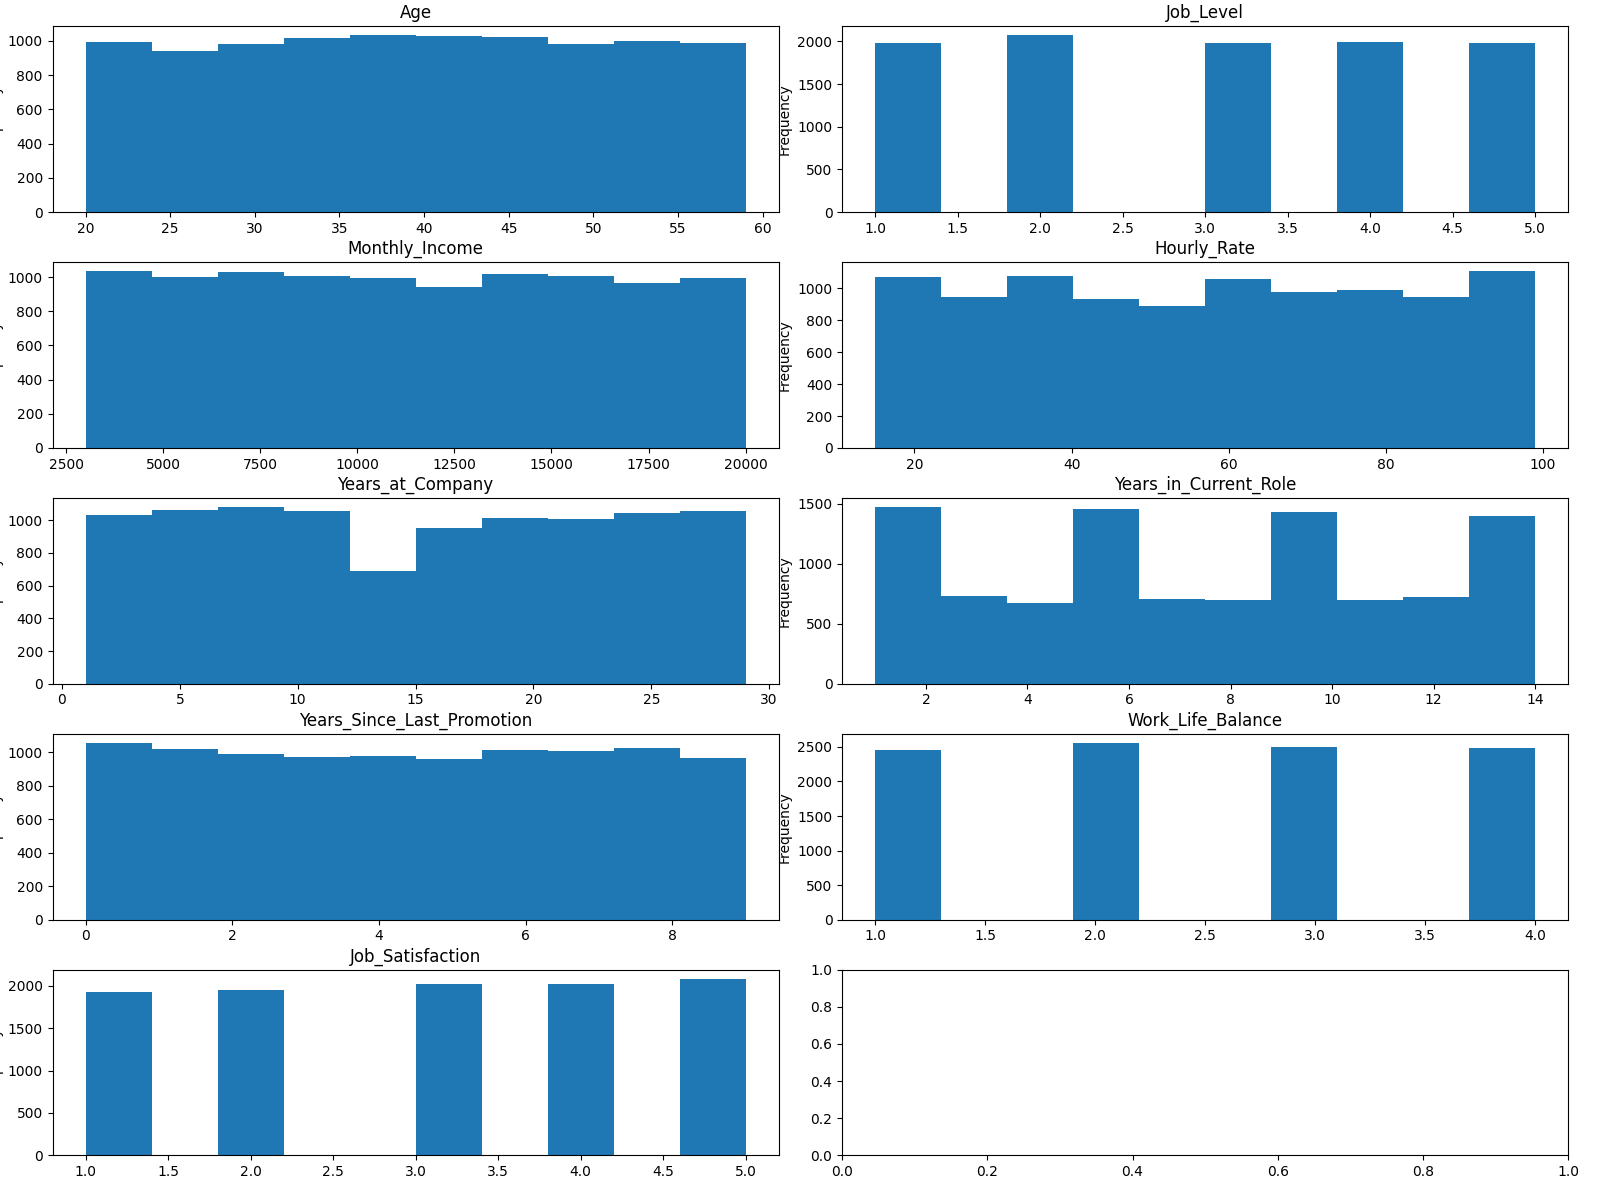

In [17]:
# Isolate numerical features
num_features = no_id_df.select_dtypes(include='int32').columns.tolist()

# Apply custom function for histograms
# Plot first half
plt.clf()
plot_hist(df=no_id_df, features=num_features[:9], n_rows=5, n_cols=2)
%matplot plt

### Interpretations:

-  `Age`: The distribution appears relatively uniform, suggesting that employees' ages are evenly spread across the range.
- `Job Level`: The distribution is discrete with five distinct levels, each having approximately equal frequency, indicating an even spread.
- `Monthly Income`: The income distribution is nearly uniform, meaning salaries are evenly distributed without significant skewness.
- `Hourly Rate`: The distribution is also roughly uniform, suggesting that employees receive a broad but evenly spread range of hourly wages.
- `Years at Company`: The distribution is mostly uniform, except for a slight dip in the middle, indicating a lower number of employees with mid-range tenure.
- `Years in Current Role`: The histogram shows gaps at certain intervals, implying certain clusters where employees tend to remain in their roles for specific durations.
- `Years Since Last Promotion`: The distribution is uniform, showing that promotions are spread evenly across employees over different years.
- `Work-Life Balance`: The data is discrete, with four distinct levels, each having roughly equal frequency, indicating a balanced distribution of work-life satisfaction ratings.
- `Job Satisfaction`: The ratings are evenly distributed across five levels, suggesting no strong bias toward dissatisfaction or satisfaction.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

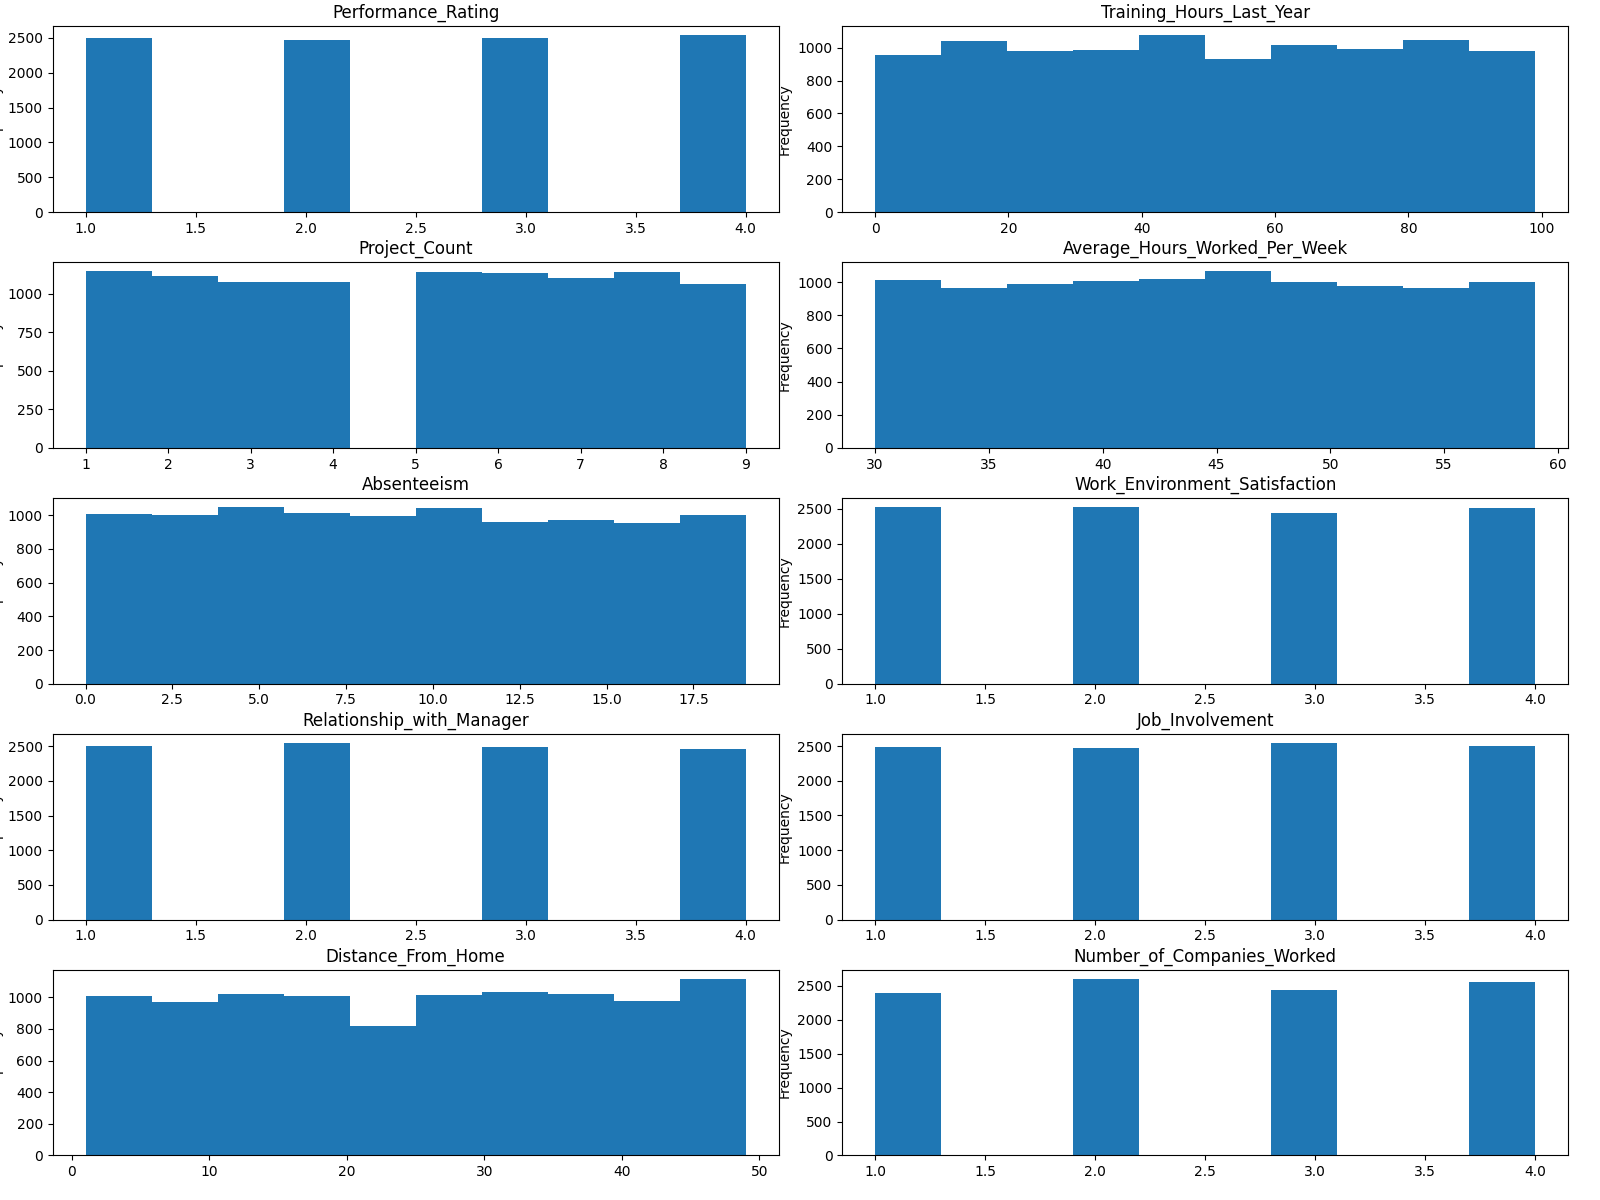

In [18]:
# Plot the second half
plt.clf()
plot_hist(df=no_id_df, features=num_features[9:], n_rows=5, n_cols=2)
%matplot plt

### Interpretations:
- `Performance Rating`: The ratings are evenly distributed across four categories, indicating no significant skewness in performance evaluations.
- `Training Hours Last Year`: The distribution appears uniform, suggesting employees received a fairly even spread of training hours.
- `Project Count`: The histogram is nearly uniform, meaning employees have similar range of project work without a clear concentration in any category.
- `Average Hours Worked Per Week`: The distribution is relatively even, implying employees work a balanced range of hours without extreme variations.
- `Absenteeism`: The histogram appears uniform, indicating employees' absenteeism is evenly spread over different values.
- `Work Environment Satisfaction`: The ratings are evenly distributed among four levels, showing no particular bias toward high or low satisfaction.
- `Relationship with Manager`: The distribution is discrete with equal frequencies across four levels, indicating balanced ratings for manager relationships.
- `Job Involvement`: The histogram shows an even distribution across four levels, suggesting no dominant trend or bias in job involvement ratings.
- `Distance from Home`: The values are quite uniformly spread, meaning employees live at varying distances and is not skewed in either end.
- `Number of Companies Worked`: The histogram shows equal distribution across categories, suggesting employees have varied past job experiences without a significant trend.

In [19]:
df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int32 
 1   Age                            10000 non-null  int32 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int32 
 7   Monthly_Income                 10000 non-null  int32 
 8   Hourly_Rate                    10000 non-null  int32 
 9   Years_at_Company               10000 non-null  int32 
 10  Years_in_Current_Role          10000 non-null  int32 
 11  Years_Since_Last_Promotion     10000 non-null  int32 
 12  Work_Life_Balance              10000 non-null  int32 
 13 

### Bar Charts for Categorical Columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

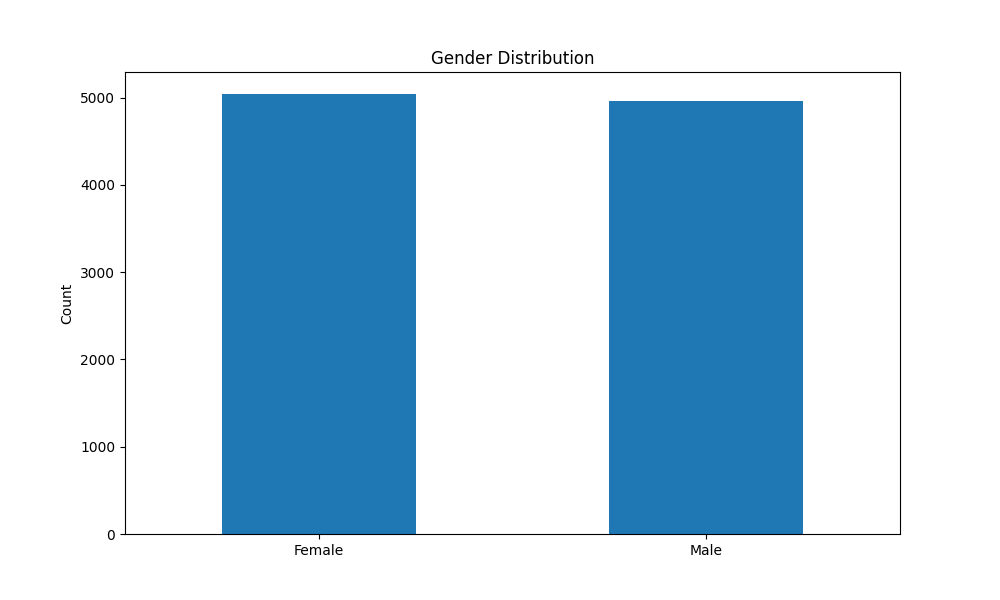

In [20]:
# Plot Gender Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot.bar()
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Gender`: Both categories are quite evenly numbered and bars are about the same height, showing that there's a pretty even amount of both male and female, with female just having slightly more.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

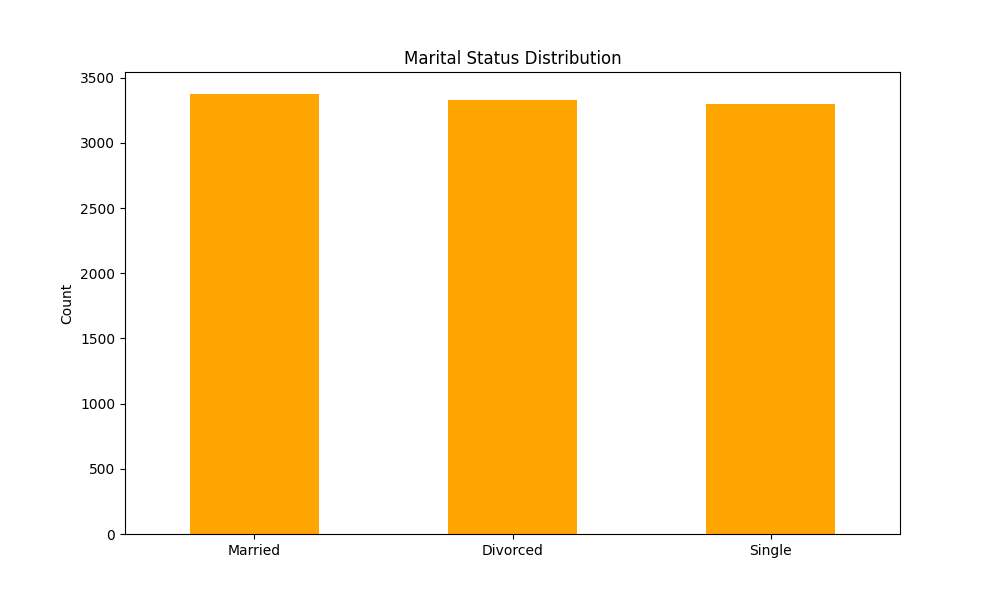

In [21]:
# Plot Marital Status Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Marital_Status'].value_counts().plot.bar(color='orange')
plt.title('Marital Status Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Marital Status`: All three cateogries are quite evenly numbered and bars are about the same height, showing that all three are evenly spread across the dataset.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

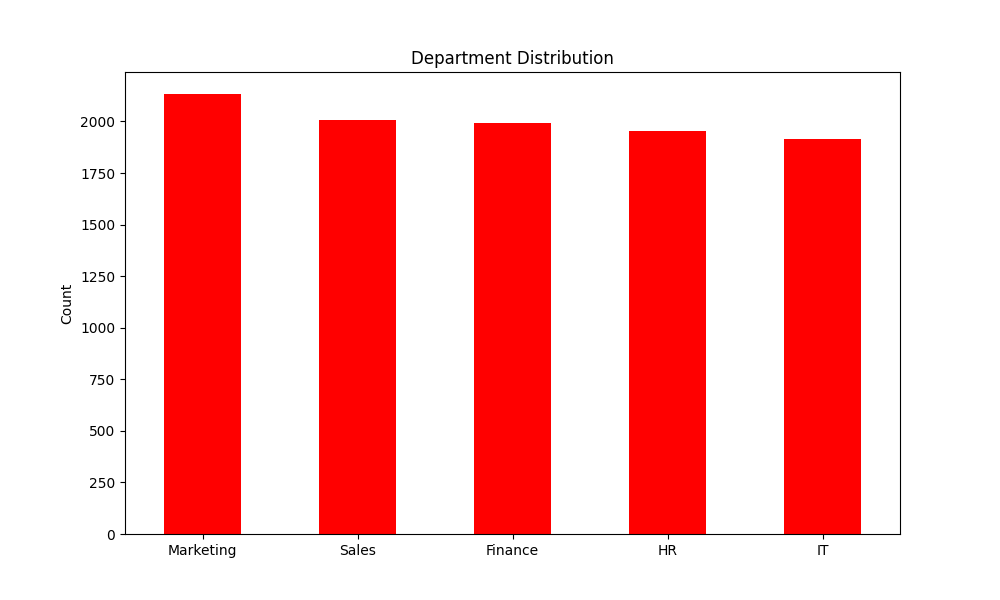

In [22]:
# Plot Department Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Department'].value_counts().plot.bar(color='red')
plt.title('Department Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Department`: All categories have a good even spread, with Marketing having slighlty dominant numbers, and  the rest being evenly distributed.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

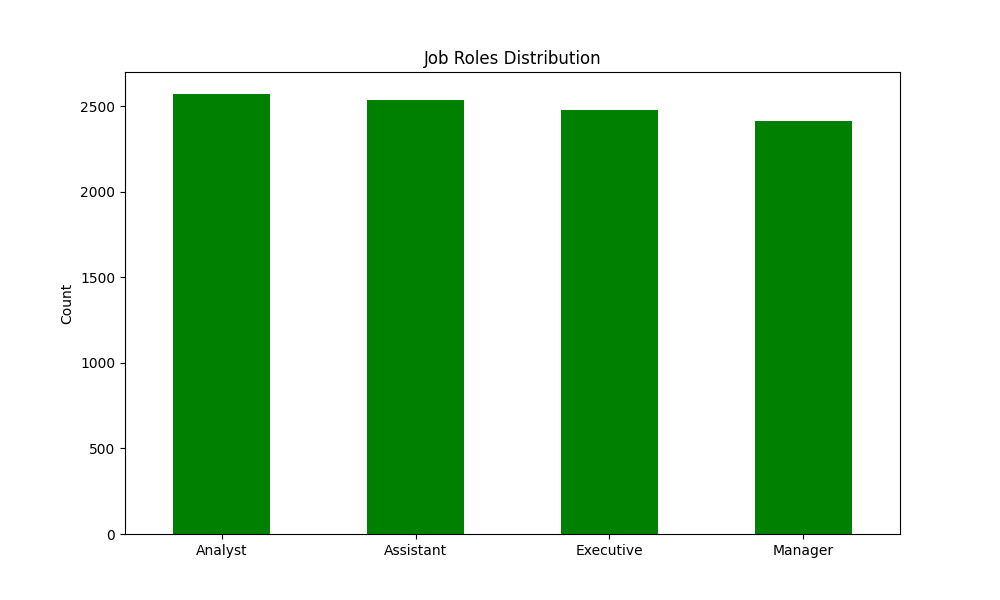

In [23]:
# Plot Job Roles Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Job_Role'].value_counts().plot.bar(color='green')
plt.title('Job Roles Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Job Roles`: All categories are roughly even, with Analyst and Assistant roles having just slighlty dominant numbers, and decreasing trend towards Managerial roles, but the differences are not quite significant.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

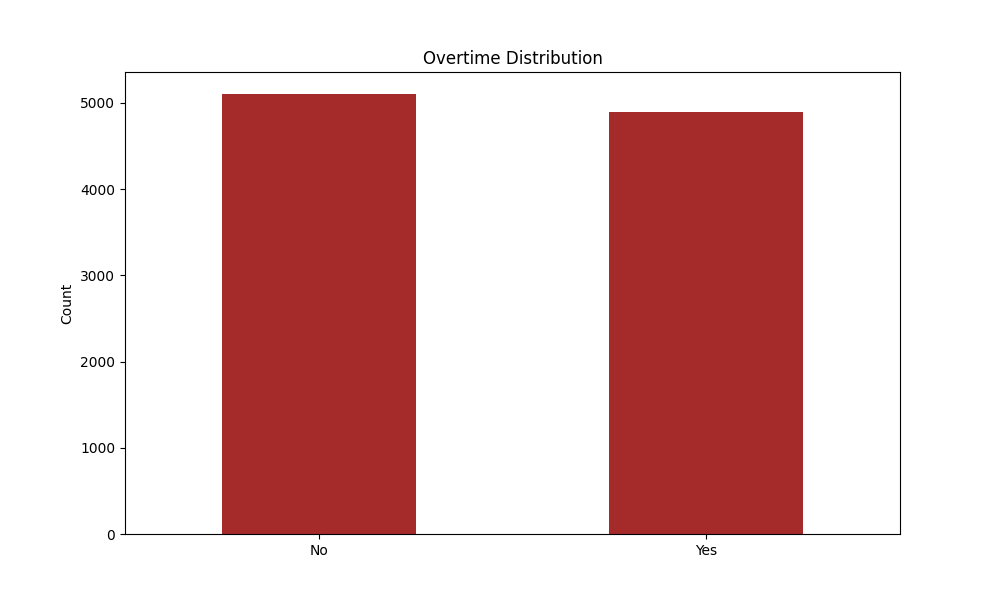

In [24]:
# Plot Overtime Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Overtime'].value_counts().plot.bar(color='brown')
plt.title('Overtime Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Overtime`: People who did not take overtime have a slight dominance but the difference is not really that significant.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

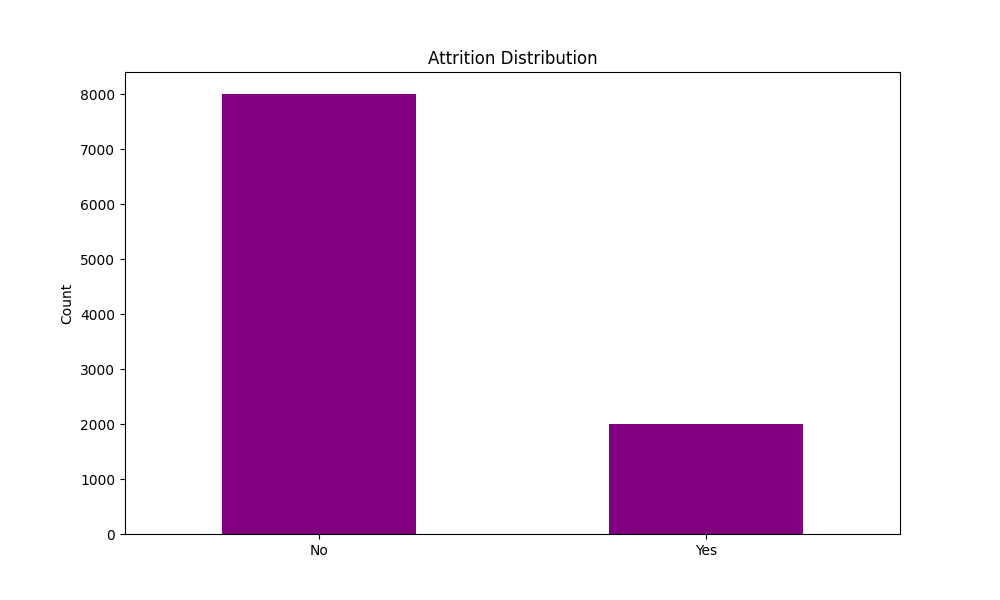

In [25]:
# Plot Attrition Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Attrition'].value_counts().plot.bar(color='purple')
plt.title('Attrition Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Attrition`: People who left the company appear to be a significantly dominant trend in the dataset; the difference is in the thousands.

### Scatterplots

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

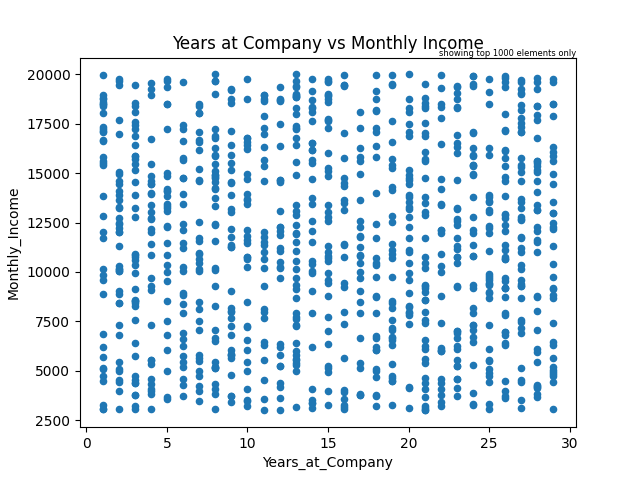

In [26]:
# Use Pandas scatter plot
# Plot Years at Company vs Monthly Income
plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Years_at_Company', y='Monthly_Income')
plt.title('Years at Company vs Monthly Income')
%matplot plt

### Interpretation:
- `Years at Company vs Monthly Income`: Scatterplot shows no relationship at all, with data points being spread out all over the chart.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

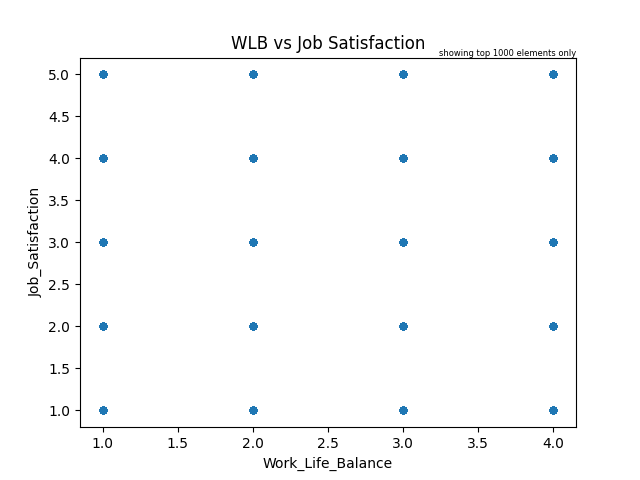

In [27]:
# Plot Work Life Balance and Job Satisfaction

plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Work_Life_Balance', y='Job_Satisfaction')
plt.title('WLB vs Job Satisfaction')
%matplot plt

### Interpretation:
- `WLB vs Job Satisfaction`: Shows no relationship at all, with data points scattered around the chart, indicating that there's no linearity.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

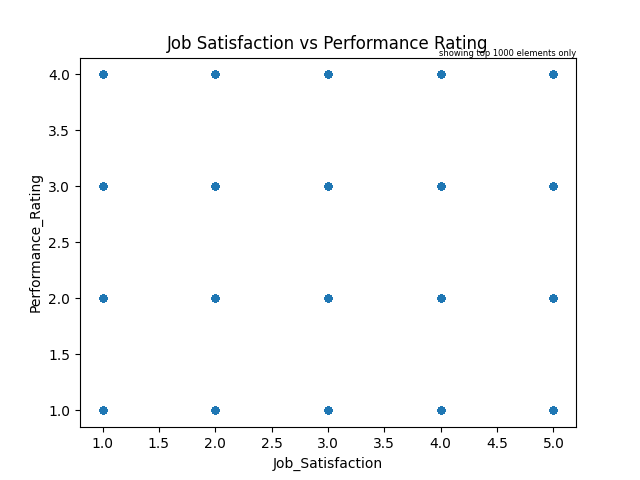

In [28]:
# Plot Job Satisfaction and Performance Rating

plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Job_Satisfaction', y='Performance_Rating')
plt.title('Job Satisfaction vs Performance Rating')
%matplot plt

### Interpretation:
- `Job Satisfaction vs Performance Rating`: Shows no relationship at all, with data points scattered all around the chart, indicating inexistence of linearity.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

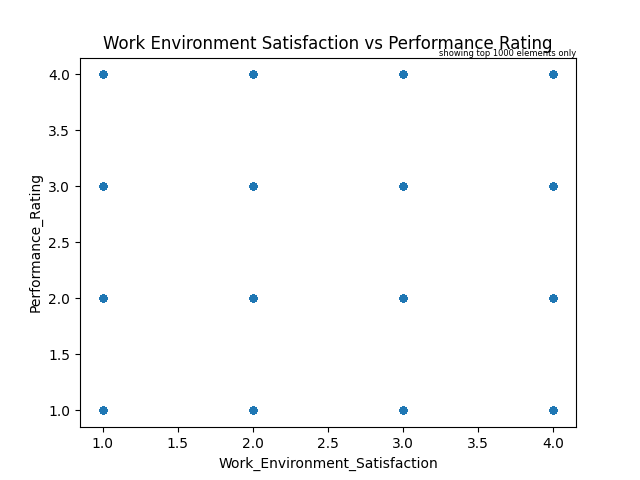

In [29]:
# Plot Work Environment Satisfaction and Performance Rating

plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Work_Environment_Satisfaction', y='Performance_Rating')
plt.title('Work Environment Satisfaction vs Performance Rating')
%matplot plt

### Interpretation:
- `Work Environment Satisfaction vs Performance Rating `: Shows no relationship at all, with data points being spread all over the chart, displaying no linearity.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

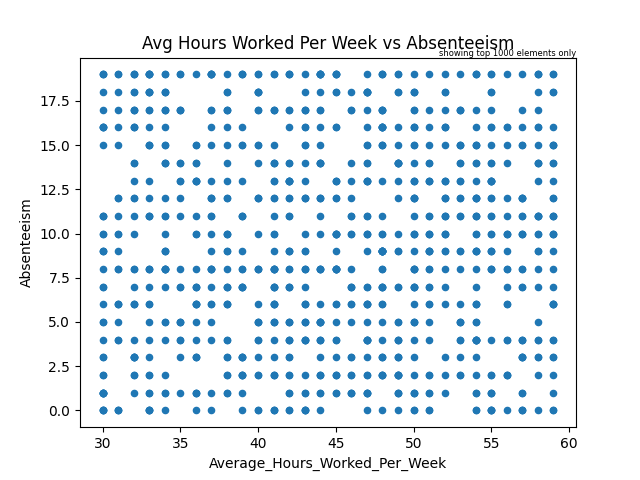

In [30]:
# Plot Avg Hours Worked per Week and Absenteeism

plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Average_Hours_Worked_Per_Week', y='Absenteeism')
plt.title('Avg Hours Worked Per Week vs Absenteeism')
%matplot plt

### Interpretation:
- `Avg Hours Worked Per Week vs Absenteeism`: Plot shows no relationship at all, with data points being spread out all over the chart axes, which again shows no linearity.

## Handling Outliers
- We'll utilize **Box Plots** and **refer to the Histograms above** to assess outliers.

In [31]:
# Convert the Spark DataFrame to Pandas first
box_plot_df = df.to_pandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt1/yarn/usercache/livy/appcache/application_1742594328576_0005/container_1742594328576_0005_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

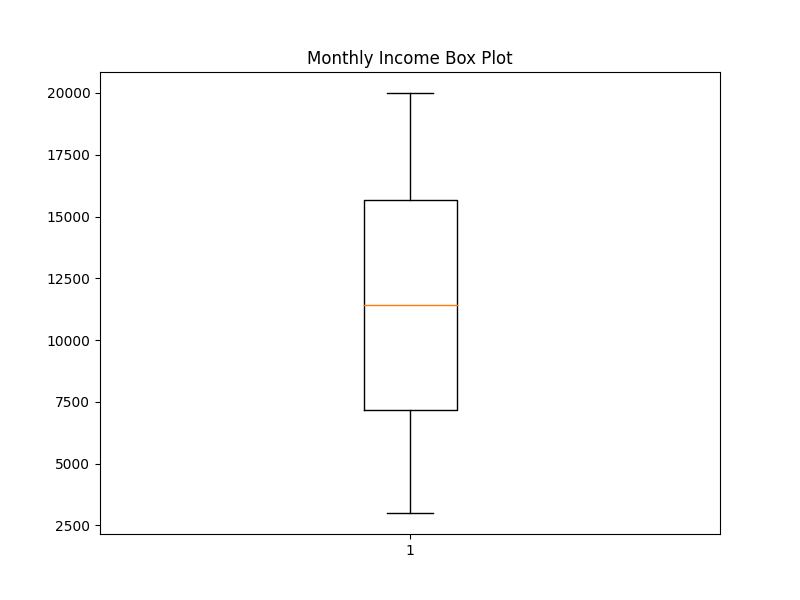

In [32]:
# Use box plot
plt.clf()
plt.figure(figsize=(8,6))
plt.boxplot(data=box_plot_df, x='Monthly_Income' )
plt.title('Monthly Income Box Plot')
%matplot plt

### Interpretation:
- `Monthly Income Box Plot`: Shows no outliers in either end.
- For this analysis, there's no need for handling outliers based on Monthly Income because there are none.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

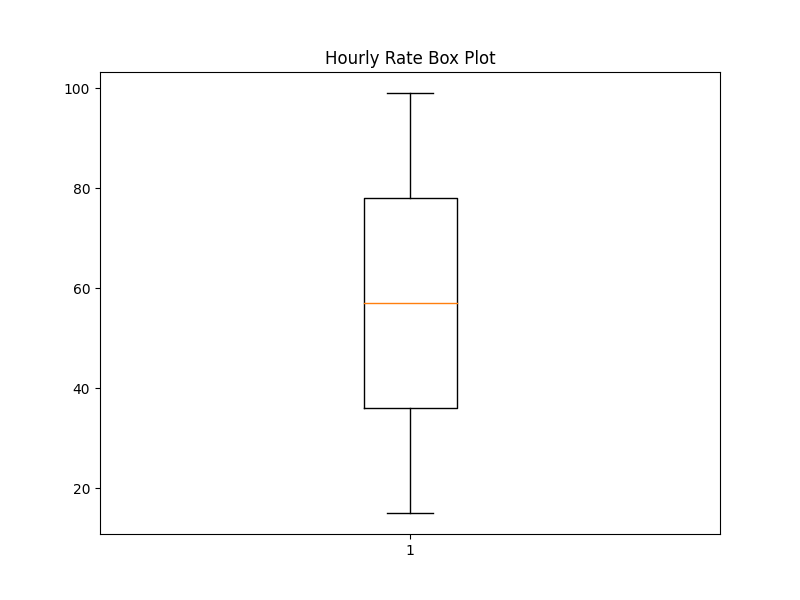

In [33]:
plt.clf()
plt.figure(figsize=(8,6))
plt.boxplot(data=box_plot_df, x='Hourly_Rate')
plt.title('Hourly Rate Box Plot')
%matplot plt

### Interpretation:
- `Hourly Rate Box Plot`: Shows no outliers in either end.
- For this analysis, there's no need for handling outliers based on Hourly Rate because there are none.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

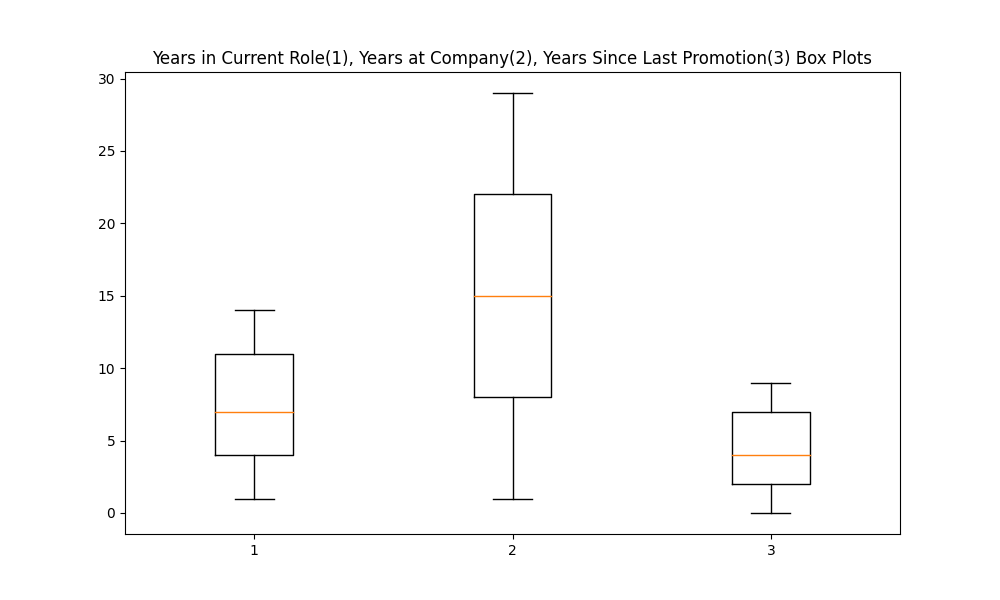

In [34]:
plt.clf()
plt.figure(figsize=(10,6))
plt.boxplot(box_plot_df[['Years_in_Current_Role', 'Years_at_Company','Years_Since_Last_Promotion']])
plt.title('Years in Current Role(1), Years at Company(2), Years Since Last Promotion(3) Box Plots')
%matplot plt

### Interpretation:
- `Years in Current Role(1), Years at Company(2), Years Since Last Promotion(3) Box Plots`: Shows no outliers on all three features.
- For this analysis, there's no need for handling outliers based on these features because there are none.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

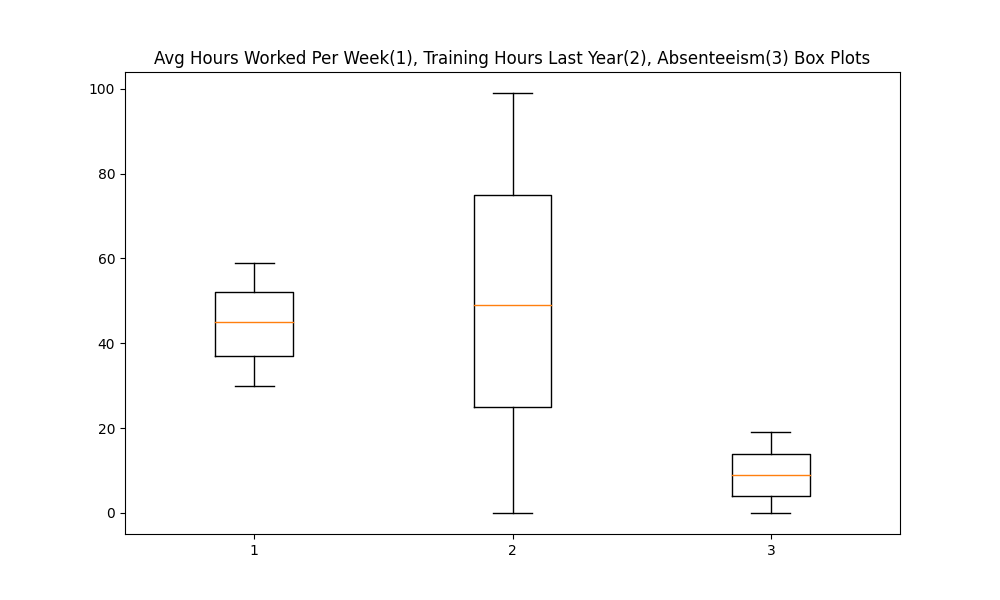

In [35]:
plt.clf()
plt.figure(figsize=(10,6))
plt.boxplot(box_plot_df[['Average_Hours_Worked_Per_Week','Training_Hours_Last_Year','Absenteeism']] )
plt.title('Avg Hours Worked Per Week(1), Training Hours Last Year(2), Absenteeism(3) Box Plots')
%matplot plt

### Interpretation:
- `Avg Hours Worked Per Week(1), Training Hours Last Year(2), Absenteeism(3) Box Plots`: Shows no outliers on all three features.
- For this analysis, there's no need for handling outliers based on these features because there are none.

## Outlier Analysis Decision:
- Based on the box plots above, there are **NO OUTLIERS** in all the seemingly important features in the dataset, considering the topic of the project.
- The histograms plotted above also displays **NO SIGNIFICANT SKEWNESS** in all the features plotted, they are all roughly uniform and evenly distributed in the features with distinct levels or categories, and no clear dominance in frequencies.
- Considering the insights gained from this analysis, there's no need for handling outliers because there is none, and we previously determined that there are no missing values, so **all of the data will be retained and utilized**.